# Exo-planet Data Analysis

**DESCRIPTION** - Our first glimpse at planets outside of the solar system we call home came in 1992 when several terrestrial-mass planets were detected orbiting the pulsar PSR B1257+12. In this project, i will analyse the characterstics of all discovered those planets and even the other planets from our solar system.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
exoplanets_df = pd.read_csv(r'C:\Users\HP\Documents\JupyterNotebook\Exoplanets data analysis\exoplanet-data.csv')

In [4]:
exoplanets_df.shape

(3584, 25)

In [5]:
pd.set_option("display.max_rows", 500, "display.max_columns", 25)

In [6]:
exoplanets_df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.60,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.00,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.170,247.20,NaN,NaN,81.90,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.020,36.67,NaN,NaN,81.90,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.070,NaN,NaN,NaN,NaN,256.8,NaN,RV,2003.0,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.0180,NaN,1605.800000,2.6800,0.250,NaN,NaN,NaN,NaN,160.2,NaN,RV,2005.0,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


## Columns Description

1. `PlanetIdentifier` - Primary identifier of planet.
2. `TypeFlag` -  [ 0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star) ]
3. `PlanteryMassJpt` - Mass of planet with respect to Jupiter's mass
4. `RadiusJpt` - Radius of planet with respect to radius of Jupiter
5. `ListsPlanetIsOn` - A list of lists the planet is on including "Confirmed planets", "Controversial", "Kepler Objects of Interest", etc.

In [7]:
exoplanets_df['DiscoveryYear'].max(), exoplanets_df['DiscoveryYear'].min()

(2017.0, 1781.0)

In [227]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["figure.autolayout"] = True

 ### ----The percentage of discovered exoplanets according to whether they are confirmed exoplanets, controversial , etc.

In [9]:
type_df = exoplanets_df.groupby(['ListsPlanetIsOn'])['ListsPlanetIsOn'].count()

In [10]:
type_df

ListsPlanetIsOn
Confirmed planets                                                                     3295
Confirmed planets, Orphan planets                                                        2
Confirmed planets, Planets in binary systems, P-type                                    21
Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters       1
Confirmed planets, Planets in binary systems, S-type                                   135
Confirmed planets, Planets in open clusters                                             13
Controversial                                                                           72
Controversial, Planets in binary systems, P-type                                         7
Controversial, Planets in binary systems, S-type                                        20
Kepler Objects of Interest                                                               4
Planets in binary systems, S-type, Confirmed planets                      

In [11]:
dict_type = type_df.to_dict()

In [12]:
def find_total(val, dict_type):
    total = 0
    for key, value in dict_type.items():
        if val in key:
            total += value
    return total

In [13]:
keywords_in_lists = ['Confirmed planets' , 'Orphan planets', 'Planets in binary systems' , 'P-type', 'Planets in globular clusters', 'S-type','Planets in open clusters', 'Controversial', 'Kepler Objects of Interest', 'Retracted planet candidate', 'Solar System']

In [14]:
value_for_keywords = [0]*len(keywords_in_lists)

In [15]:
for i in range(len(keywords_in_lists)):
    value_for_keywords[i] = find_total(keywords_in_lists[i], dict_type)

In [16]:
value_for_keywords

[3468, 2, 185, 29, 1, 156, 13, 99, 4, 4, 9]

In [224]:
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(11)]

In [18]:
percent = list((100*np.array(value_for_keywords))/np.array(value_for_keywords).sum())

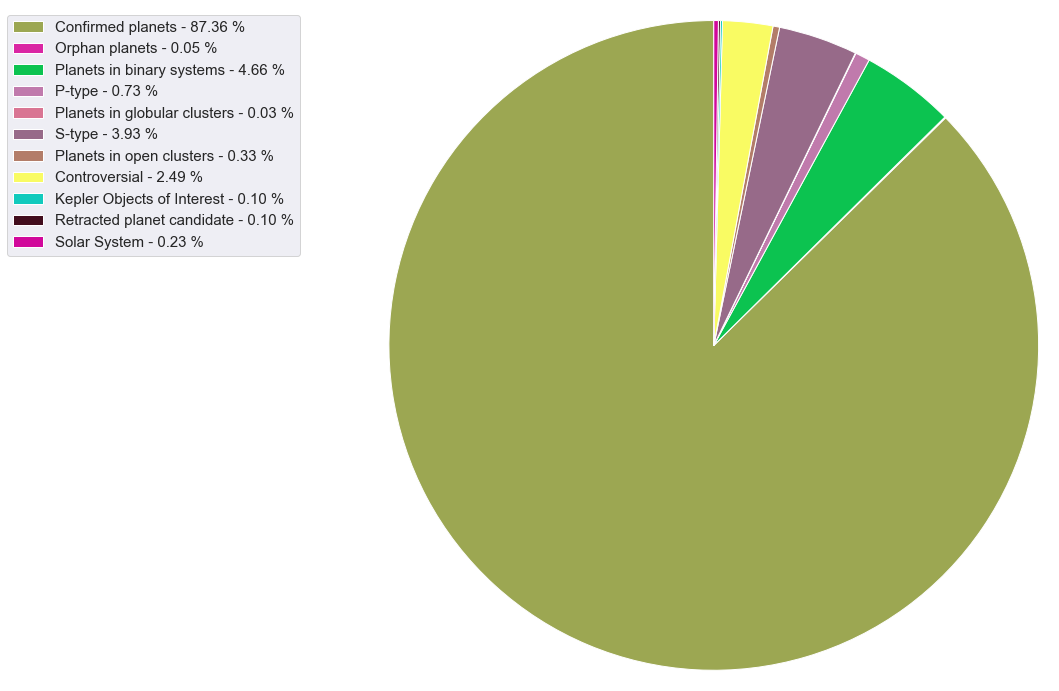

In [228]:
patches, texts = plt.pie(value_for_keywords, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keywords_in_lists, percent)]
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)

### ---- 10 years where most exoplanets were discovered.

In [20]:
year_df = pd.DataFrame(exoplanets_df.groupby(['DiscoveryYear'])['PlanetIdentifier'].count()).reset_index()

In [21]:
year_df = year_df.rename(columns={'PlanetIdentifier' : 'Count'})

In [22]:
year_df = year_df.sort_values(['Count'], ascending=False).head(10)

In [23]:
year_df

,DiscoveryYear,Count
26,2016.0,1415
24,2014.0,928
25,2015.0,199
21,2011.0,189
23,2013.0,140
22,2012.0,131
20,2010.0,120
19,2009.0,81
18,2008.0,66
17,2007.0,64


Text(0, 0.5, 'Total Discoveries')

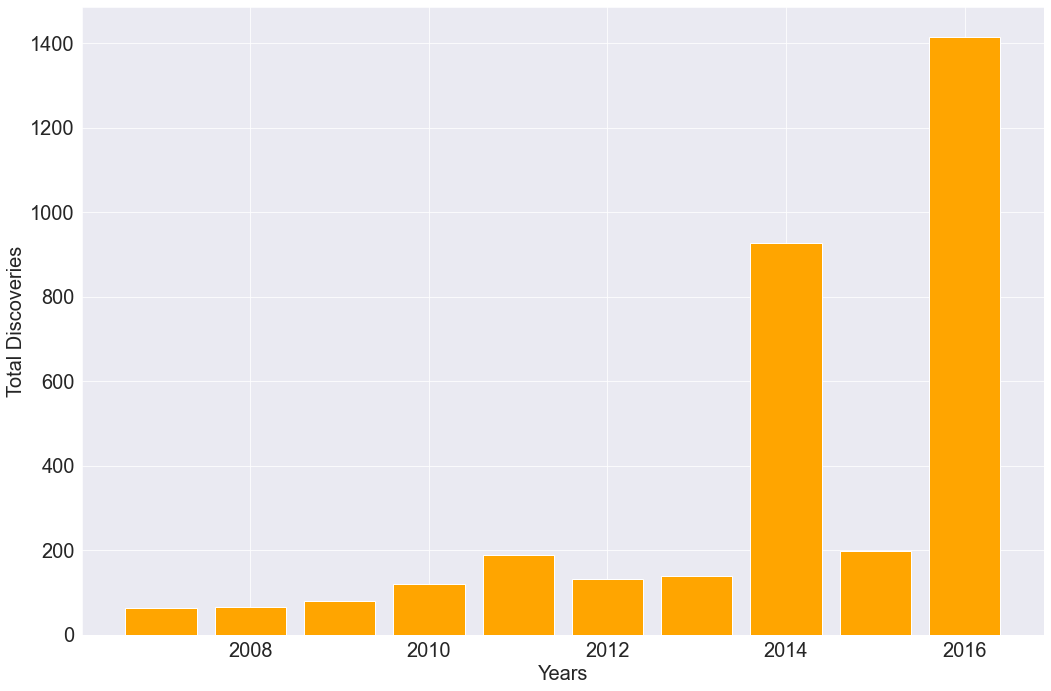

In [229]:
plt.bar(year_df['DiscoveryYear'], year_df['Count'], color=['Orange'])
plt.xlabel('Years')
plt.ylabel('Total Discoveries')

### ----Surface temprature range under which the most number of planets fall.

In [92]:
surface_temp_df = exoplanets_df.loc[exoplanets_df['SurfaceTempK'].notnull()]
surface_temp_df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
5,Kepler-9 b,0,0.250,0.840,19.224180,0.14300,0.0626,NaN,NaN,NaN,87.10,707.2,NaN,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.070,1.020,0.12,5777.0,NaN,Confirmed planets
6,Kepler-9 c,0,0.170,0.820,39.031060,0.22900,0.0684,NaN,NaN,NaN,87.20,557.9,NaN,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.070,1.020,0.12,5777.0,NaN,Confirmed planets
7,Kepler-9 d,0,0.022,0.147,1.592851,0.02710,NaN,NaN,NaN,NaN,NaN,1601.5,NaN,transit,2010.0,14/03/10,19 02 17,+38 24 03,650.0,1.070,1.020,0.12,5777.0,NaN,Confirmed planets
10,WASP-124 b,0,0.600,1.240,3.372650,0.04490,NaN,NaN,NaN,NaN,86.30,1400.0,NaN,transit,2016.0,16/02/04,22 10 51.43,-30 44 58.8,433.0,1.070,NaN,-0.02,6050.0,NaN,Confirmed planets
15,WASP-82 b,0,1.240,1.670,2.705782,0.04470,NaN,NaN,NaN,NaN,87.90,2190.0,NaN,transit,2013.0,13/10/22,04 50 39,+01 53 38,200.0,1.630,2.180,0.12,6490.0,NaN,Confirmed planets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,WASP-122 b,0,1.372,1.972,1.710057,0.03107,0.0000,NaN,NaN,NaN,78.35,1960.0,NaN,transit,2015.0,15/09/07,07 13 12.34,-42 24 35.1,NaN,1.400,1.567,0.32,5720.0,5.0,Confirmed planets
3574,HAT-P-21 b,0,4.063,1.024,4.124461,0.04940,0.2280,NaN,NaN,NaN,87.20,1161.5,NaN,transit,2010.0,13/05/29,11 25 06,+41 01 41,254.0,0.947,1.105,0.01,5588.0,NaN,Confirmed planets
3577,HAT-P-34 b,0,3.328,1.197,5.452700,0.06770,0.4410,NaN,NaN,NaN,87.10,1335.3,NaN,transit,2012.0,13/05/29,20 12 46.885,+18 06 17.42,257.0,1.392,1.535,0.22,6442.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.360,NaN,395.400000,1.05100,0.0700,NaN,NaN,NaN,NaN,256.8,NaN,RV,2003.0,10/12/29,12 30 26,+22 52 47,68.5,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


Text(0, 0.5, 'Number of planets falling in this range')

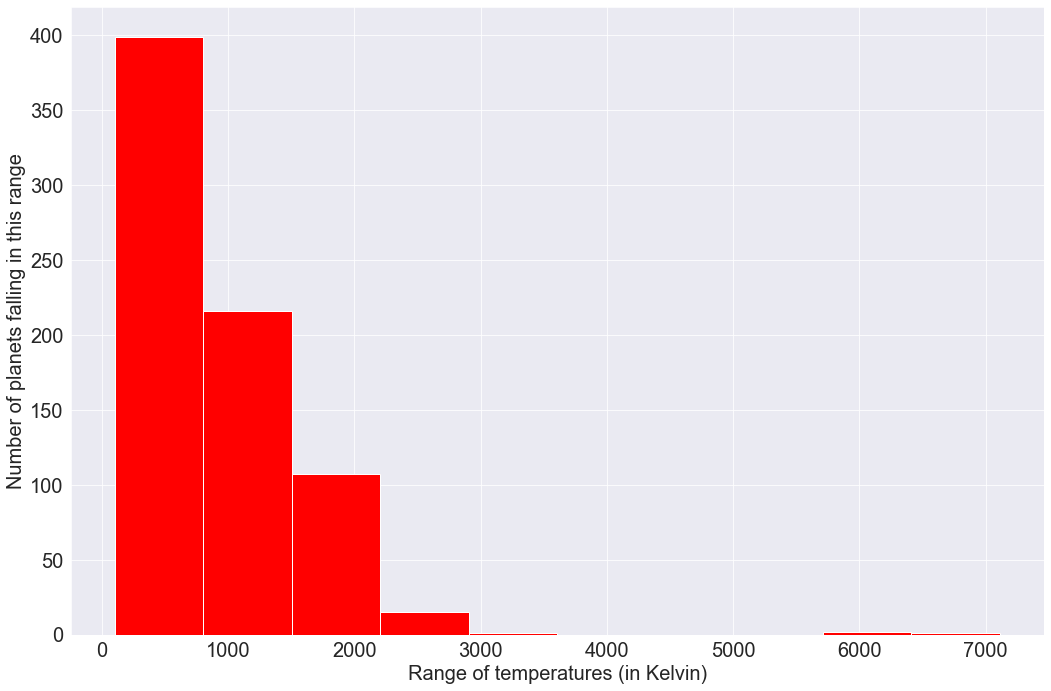

In [230]:
plt.hist(surface_temp_df['SurfaceTempK'], color=['red'])
plt.xlabel('Range of temperatures (in Kelvin)')
plt.ylabel('Number of planets falling in this range')

### ---- Top 20 heaviest planets relative to Jupiter.

In [27]:
heavy_df = exoplanets_df.loc[exoplanets_df['PlanetaryMassJpt'].notnull()]

In [28]:
heavy_df = heavy_df.sort_values(['PlanetaryMassJpt'], ascending=False)
heavy_df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
2905,HD 156846 b,2,263.000000,NaN,359.5546,1.096000,0.847850,51.620000,NaN,185.300000,177.300000,NaN,NaN,RV,2008.0,14/11/06,17 20 34.31129,-19 20 01.4991,49.00,1.350,2.120000,1.700000e-01,5969.0,NaN,"Controversial, Planets in binary systems, S-type"
141,Rho Coronae Borealis b,0,169.700000,NaN,39.8449,0.240000,0.057000,303.000000,NaN,266.400000,0.400000,NaN,NaN,RV,1997.0,15/04/20,16 01 02.662,+33 18 12.63,17.24,1.000,NaN,NaN,5823.0,NaN,Controversial
207,HD 131664 b,0,85.200000,NaN,1951.0000,3.170000,0.638000,149.700000,NaN,320.800000,167.100000,NaN,NaN,RV,NaN,15/01/14,15 00 06.08,-73 32 07.2,55.43,1.100,1.160000,3.200000e-01,5886.0,2.40,Controversial
2361,HU Aqr (AB) d,1,80.000000,NaN,NaN,12.887000,0.015800,311.940000,NaN,0.000000,90.000000,NaN,NaN,timing,2014.0,15/05/24,21 07 58,-05 17 41,NaN,NaN,NaN,NaN,NaN,NaN,"Controversial, Planets in binary systems, P-type"
817,HD 984 b,0,65.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,2730.0,NaN,imaging,2017.0,17/03/09,00 14 10,-07 48 03,47.10,1.200,NaN,NaN,6315.0,80.00,Confirmed planets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Mars,0,0.000338,0.048489,686.9800,1.523712,0.093365,-23.917448,-4.568132,49.713210,1.851819,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.000,1.000000,1.000000e-08,5778.0,4.57,Solar System
1128,Kepler-138 b,0,0.000208,0.047570,10.3126,0.075000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transit,2014.0,15/07/14,19 21 31,+43 17 34,114.07,0.521,0.442000,-2.800000e-01,3841.0,NaN,Confirmed planets
408,Mercury,0,0.000174,0.034902,87.9700,0.387098,0.205637,77.457719,252.251667,48.339618,7.005594,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.000,1.000000,1.000000e-08,5778.0,4.57,Solar System
3323,PSR 1257+12 A,0,0.000063,NaN,25.2620,0.190000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,timing,1992.0,16/04/12,13 00 03.5767,+12 40 56.4721,710.00,1.400,0.000014,NaN,NaN,3.00,Confirmed planets


In [231]:
heavy_planets_df = pd.DataFrame(heavy_df['PlanetIdentifier']).head(50)
heavy_planets_df['PlanetaryMassJpt'] = heavy_df['PlanetaryMassJpt']
heavy_planets_df = heavy_planets_df.set_index('PlanetIdentifier')
heavy_planets_df

,PlanetaryMassJpt
PlanetIdentifier,
HD 156846 b,263.000000
Rho Coronae Borealis b,169.700000
HD 131664 b,85.200000
HU Aqr (AB) d,80.000000
HD 984 b,65.000000
WASP-81 c,56.600000
Kappa And b,50.000000
2M 0746+20 b,30.000000
2M 2206-20 b,30.000000


<AxesSubplot:ylabel='PlanetIdentifier'>

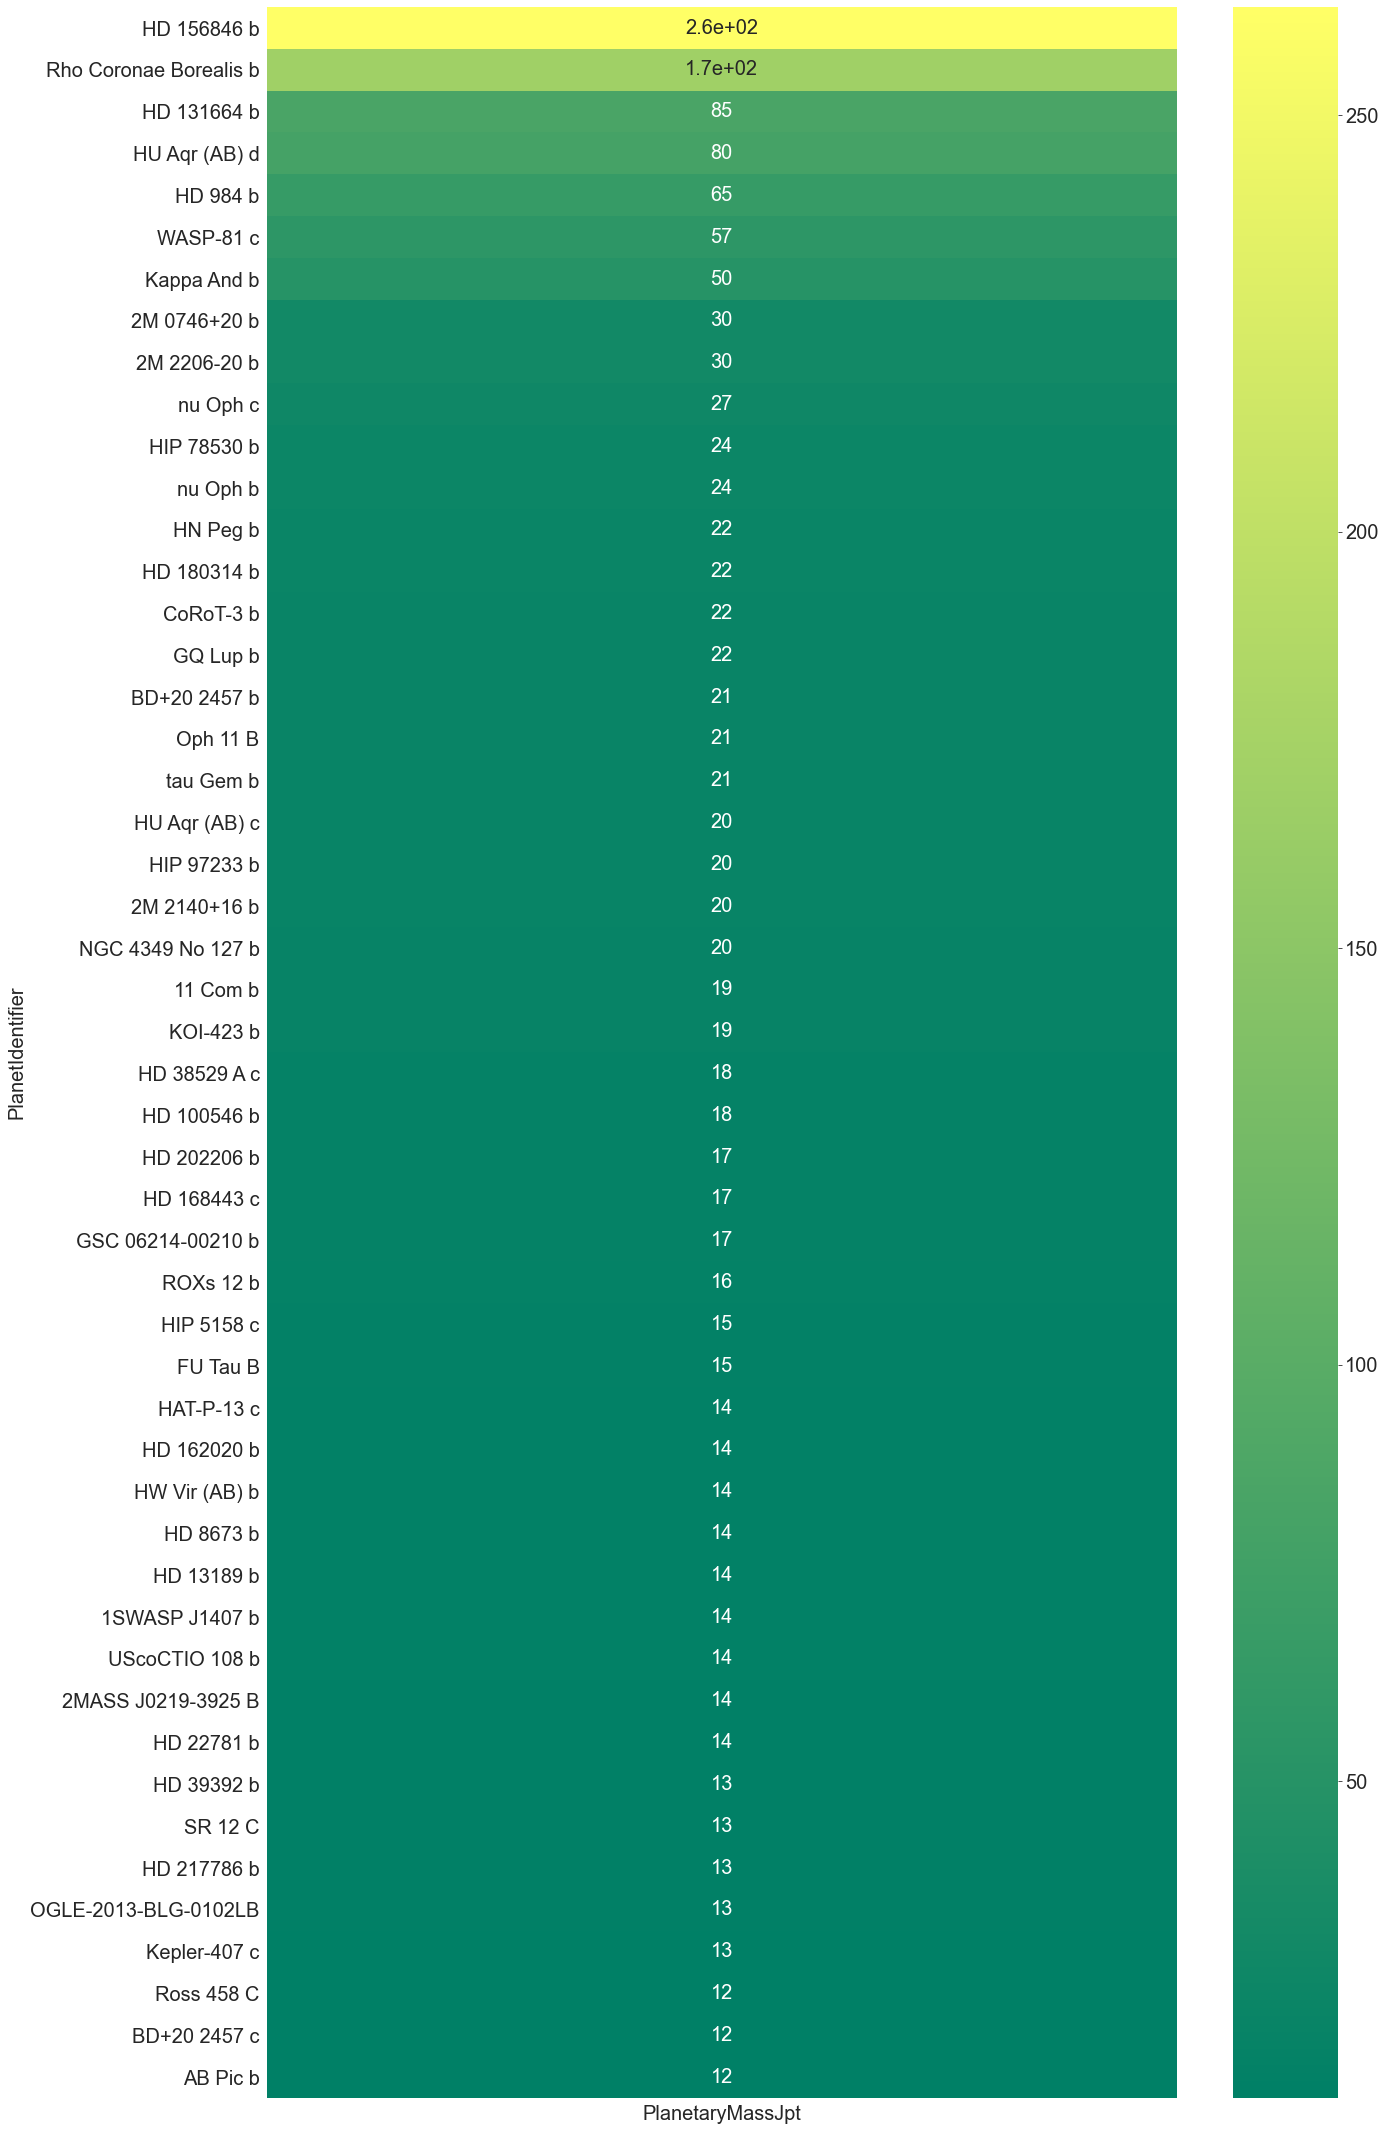

In [252]:
plt.figure(figsize=(20,30))
sns.heatmap(heavy_planets_df, annot=True, cmap='summer')

### ----Finding out which planets can be potentially habitable with respect to their surface temprature.

In [36]:
temp_df = exoplanets_df.loc[exoplanets_df['SurfaceTempK'].notnull()]

In [37]:
temp_df = temp_df.loc[((temp_df['SurfaceTempK'] <= 395.15) & (temp_df["SurfaceTempK"] >= 258.15))]
temp_df.shape

(86, 25)

In [38]:
temp_df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
19,HD 4203 b,0,1.820000,NaN,437.050000,1.17350,0.520000,NaN,NaN,NaN,NaN,263.9,NaN,RV,2001.0,14/03/11,00 44 41,+20 26 56,77.82000,1.1300,1.330,0.453,5702.0,NaN,Confirmed planets
68,HIP 11952 b,0,2.930000,NaN,290.000000,0.81000,0.270000,NaN,NaN,NaN,NaN,372.6,NaN,RV,2012.0,13/02/14,02 34 11,-12 23 03,111.00000,0.8300,1.600,-1.900,6040.0,NaN,Controversial
93,HD 154672 b,0,5.020000,NaN,163.910000,0.60000,0.610000,NaN,NaN,NaN,NaN,357.1,NaN,RV,2008.0,09/05/20,17 10 05,-56 26 57,65.80000,1.0600,1.270,0.260,5714.0,NaN,Confirmed planets
148,HD 156279 b,0,9.710000,NaN,131.050000,0.49500,0.708000,NaN,NaN,NaN,NaN,327.8,NaN,RV,2011.0,11/11/04,17 12 23,+63 21 08,36.60000,0.9300,NaN,0.140,5453.0,NaN,Confirmed planets
166,HD 12661 b,0,2.300000,NaN,263.600000,0.83000,0.377000,NaN,NaN,NaN,NaN,291.4,NaN,RV,2000.0,11/01/04,02 04 34,+25 24 51,37.16000,1.0700,1.120,0.290,5742.0,NaN,Confirmed planets
199,HD 202206 b,0,17.400000,NaN,255.870000,0.83000,0.435000,NaN,NaN,NaN,NaN,277.6,NaN,RV,2002.0,10/12/30,21 14 57,-20 47 21,46.34000,1.1300,1.020,0.370,5750.0,NaN,Confirmed planets
312,HD 9446 c,0,1.820000,NaN,192.900000,0.65400,0.060000,NaN,NaN,NaN,NaN,315.8,NaN,RV,2010.0,10/01/05,01 33 20,+29 15 55,53.00000,1.0000,1.000,0.090,5793.0,NaN,Confirmed planets
331,HR 810 b,0,2.260000,NaN,320.100000,0.92500,0.161000,NaN,NaN,NaN,NaN,373.3,NaN,RV,1999.0,10/12/29,02 42 31,-50 48 12,17.17000,1.1100,1.850,0.250,5997.0,NaN,Confirmed planets
398,HD 154857 b,0,2.240000,NaN,408.600000,1.29100,0.460000,57.000000,NaN,NaN,NaN,336.0,NaN,RV,2004.0,14/01/25,17 11 15,-56 40 50,64.20000,1.7180,2.310,-0.310,5508.0,NaN,Confirmed planets
610,HD 69830 d,0,0.058000,NaN,197.000000,0.63000,0.070000,NaN,NaN,NaN,13.000,282.9,NaN,RV,2006.0,10/10/19,08 18 23,-12 37 55,12.60000,0.8600,0.895,-0.050,5385.0,NaN,Confirmed planets


<AxesSubplot:xlabel='PlanetIdentifier', ylabel='SurfaceTempK'>

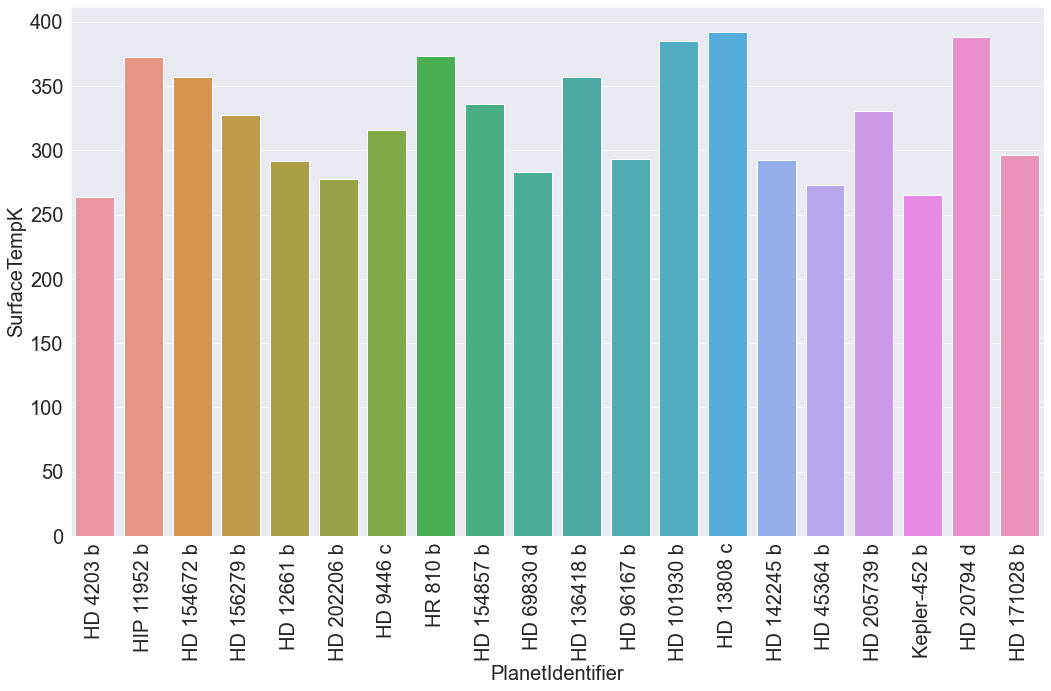

In [233]:
temp_df = temp_df.head(20)
plt.xticks(rotation = 90)
sns.barplot(y=temp_df['SurfaceTempK'], x=temp_df['PlanetIdentifier'])

### ---- Getting the spectral class of host stars according to their surface temprature.


|**SPECTRAL CLASS**|**TEMPRATURE**|**CHROMATICITY**|
|---------|--------------|----------------|
|**O**|>= 30,000 K|blue| 
|**B**|10,000-30,000 K|blue white|
|**A**|7,500-10,000 K|white|
|**F**|6,000-7,500 K|yellow white|
|**G**|5,200-6,000 K|yellow|
|**K**|3,700-5,200 K|light orange|
|**M**|2,400-3,700 K|orange red|
|**L**|1,300-2,400 K|dark red|
|**T**|550-1,300 K|dark magenta|
|**Y**|< 550 K|brownish| 

In [40]:
host_star_temp_df = exoplanets_df.loc[exoplanets_df['HostStarTempK'].notnull()]

In [42]:
host_star_temp_df = host_star_temp_df.sort_values(['HostStarTempK'], ascending=False)

In [43]:
host_star_temp_df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
2857,V391 Peg b,0,3.2000,NaN,1170.00000,1.7000,0.000,NaN,NaN,NaN,NaN,475.2,NaN,timing,2007.0,07/09/14,22 04 12,+26 25 08,1400.00,0.500,0.230,NaN,29300.0,NaN,Confirmed planets
2780,KOI-55 b,0,0.0014,0.068,0.24010,0.0060,NaN,NaN,NaN,NaN,NaN,7112.0,NaN,imaging,2011.0,15/08/26,19 45 25,+41 05 34,1180.00,0.496,0.203,NaN,27730.0,NaN,Controversial
2781,KOI-55 c,0,0.0021,0.078,0.34289,0.0076,NaN,NaN,NaN,NaN,NaN,6319.1,NaN,imaging,2011.0,15/08/26,19 45 25,+41 05 34,1180.00,0.496,0.203,NaN,27730.0,NaN,Controversial
2895,KIC 10001893 c,0,NaN,NaN,0.32530,0.0070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,imaging,2014.0,15/01/26,19 09 33.405,+46 59 04.16,NaN,0.470,0.240,NaN,27500.0,NaN,Controversial
2896,KIC 10001893 d,0,NaN,NaN,0.81160,0.0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,imaging,2014.0,15/01/26,19 09 33.405,+46 59 04.16,NaN,0.470,0.240,NaN,27500.0,NaN,Controversial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2M 2206-20 b,0,30.0000,1.300,8686.00000,4.4800,0.000,NaN,NaN,NaN,44.3,NaN,NaN,imaging,2010.0,12/01/20,22 06 22.802,-20 47 05.90,26.67,0.130,0.110,NaN,2350.0,NaN,Confirmed planets
2484,2M 2140+16 b,0,20.0000,0.920,7340.00000,3.5300,0.260,NaN,NaN,NaN,46.2,NaN,NaN,imaging,2010.0,12/01/20,21 40 29,+16 25 18,25.00,0.080,0.100,NaN,2300.0,NaN,Confirmed planets
3386,2M 0746+20 b,0,30.0000,0.970,4640.00000,2.8970,0.487,NaN,NaN,NaN,138.2,NaN,NaN,imaging,2010.0,12/01/20,07 46 42.562,+20 00 32.18,12.21,0.120,0.089,NaN,2205.0,NaN,Confirmed planets
2744,2M 044144 b,2,9.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.0,NaN,imaging,2010.0,15/09/12,04 41 45.652,+23 01 58.07,145.00,0.018,NaN,NaN,2100.0,NaN,"Confirmed planets, Planets in binary systems, ..."


In [59]:
def get_count(category, temp_range):
    count = 0
    low, high = temp_range
    if high == -1:
        for i in host_star_temp_df['HostStarTempK']:
            if i >= low:
                count += 1
        return count
    elif low == -1:
        for i in host_star_temp_df['HostStarTempK']:
            if i < high:
                count += 1
        return count
    else:
        for i in host_star_temp_df['HostStarTempK']:
            if i >= low and i < high:
                count += 1
        return count

In [48]:
star_categories = ['O','B','A','F','G','K','M','L','T','Y']
temp_ranges = [(30000,-1),(10000,30000),(7500,10000),(6000,7500),(5200,6000),(3700,5200),(2400,3700),(1300,2400),(550,1300),(-1,550)]

In [235]:
colors = ['#0000ff','#b7e9f7','#ffffff','#ffffed','#ffff00','#ffd580','#ff4500','#8b0000','#3f003f','#2b1d0e']

In [88]:
count_star = [0]*10
for i in range(10):
    count_star[i] = get_count(star_categories[i],temp_ranges[i])

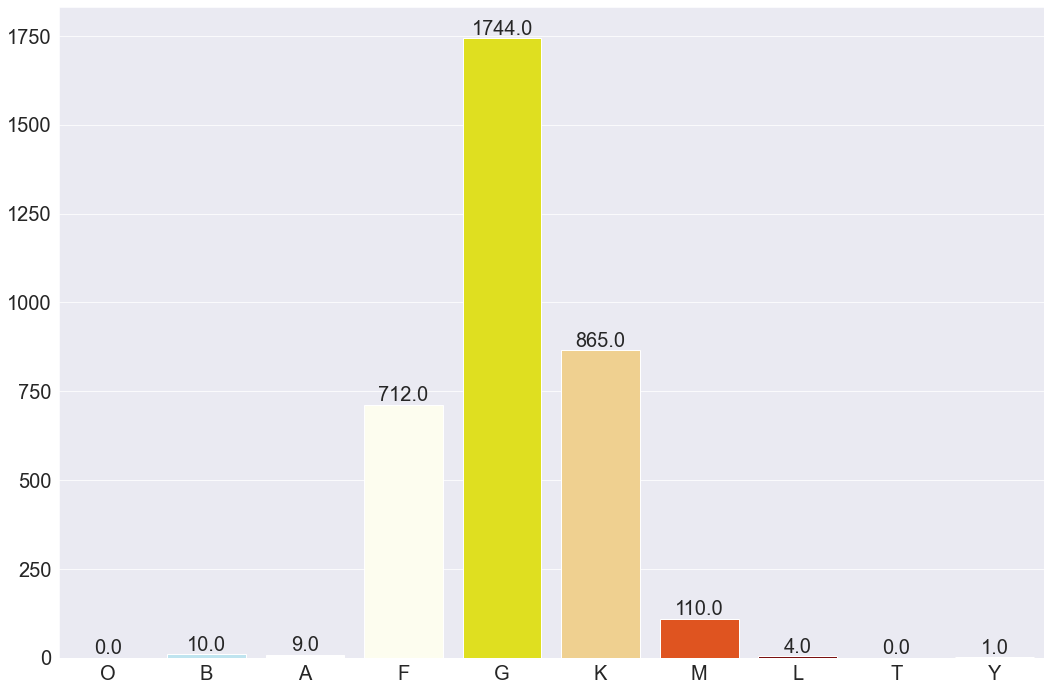

In [236]:
b_plot = sns.barplot(x=star_categories, y=count_star, palette = colors)
for p in b_plot.patches:
    b_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### ---- Finding the count of usage of different discovery mthods.

In [237]:
discovery_method_df = pd.DataFrame(exoplanets_df.groupby(['DiscoveryMethod'])['PlanetIdentifier'].count()).reset_index()
discovery_method_df = discovery_method_df.rename(columns={'PlanetIdentifier' : 'Count'})
discovery_method_df

,DiscoveryMethod,Count
0,RV,692
1,imaging,52
2,microlensing,40
3,timing,25
4,transit,2712


<AxesSubplot:xlabel='Count', ylabel='DiscoveryMethod'>

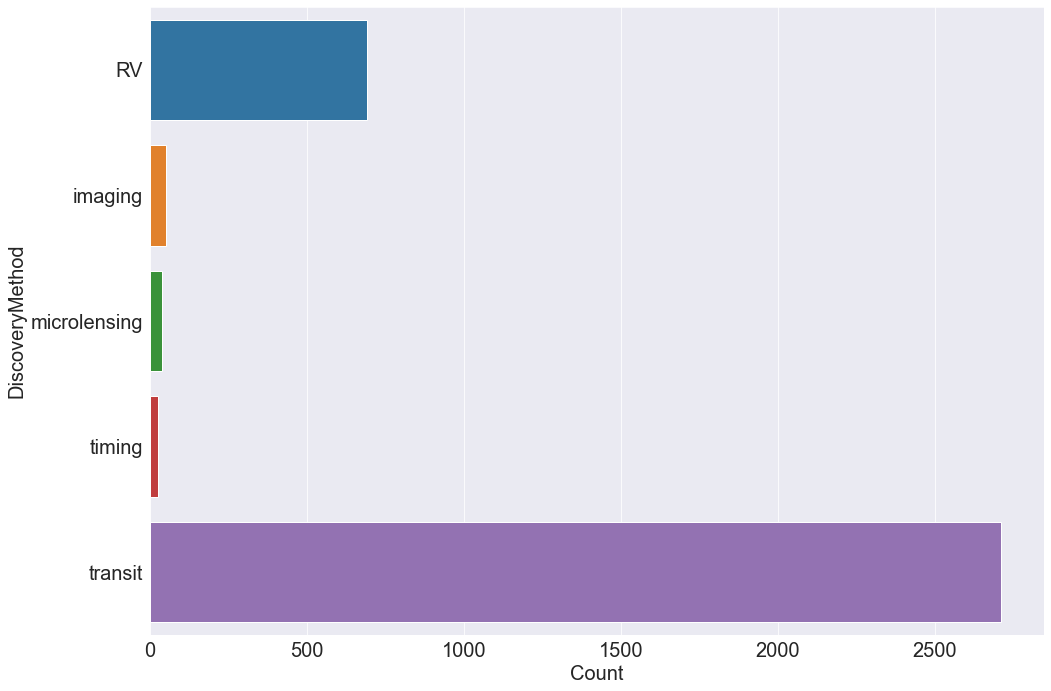

In [238]:
sns.barplot(x=discovery_method_df['Count'], y=discovery_method_df['DiscoveryMethod'])

In [185]:
exoplanets_df.loc[exoplanets_df['HostStarAgeGyr'].notnull()]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
30,Kepler-131 b,0,0.050740,0.219624,16.092000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transit,2014.0,14/02/24,19 14 07,+40 56 32,226.3,1.020,1.030,0.12,5685.0,3.66,Confirmed planets
31,Kepler-131 c,0,0.025952,0.076549,25.516900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transit,2014.0,14/02/24,19 14 07,+40 56 32,226.3,1.020,1.030,0.12,5685.0,3.66,Confirmed planets
33,HD 114729 A b,2,0.840000,NaN,1135.000000,2.08000,0.3200,NaN,NaN,NaN,NaN,NaN,NaN,RV,2002.0,12/12/08,13 12 44,-31 52 24,35.0,0.930,1.460,-0.22,NaN,6.00,"Confirmed planets, Planets in binary systems, ..."
34,CoRoT-24 b,0,NaN,0.330000,5.113400,0.05600,0.0000,NaN,NaN,NaN,86.50,1070.0,NaN,transit,2014.0,14/06/08,06 47 41,-03 43 10,600.0,0.910,0.860,0.30,4950.0,11.00,Confirmed planets
35,CoRoT-24 c,0,0.088000,0.440000,11.759000,0.09800,0.0000,NaN,NaN,NaN,89.00,850.0,NaN,transit,2014.0,14/06/08,06 47 41,-03 43 10,600.0,0.910,0.860,0.30,4950.0,11.00,Confirmed planets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,EPIC 216468514 b,0,0.840000,1.440000,3.313920,0.04800,NaN,NaN,NaN,NaN,81.90,NaN,NaN,NaN,2016.0,17/02/21,18 59 56,-22 42 24,NaN,1.300,1.780,0.10,6030.0,4.25,Confirmed planets
3546,HATS-12 b,0,2.400000,1.350000,3.142833,0.04795,0.0850,NaN,NaN,NaN,82.70,NaN,NaN,transit,2016.0,16/05/01,19 16 49,-19 38 39,981.0,1.490,2.210,-0.10,6408.0,2.36,Confirmed planets
3553,Kepler-412 b,0,0.939000,1.325000,1.720861,0.02959,0.0038,125.0,NaN,NaN,80.89,NaN,NaN,transit,2014.0,14/01/29,19 04 26,+43 40 51,1056.0,1.167,1.287,0.27,5750.0,5.10,Confirmed planets
3572,WASP-122 b,0,1.372000,1.972000,1.710057,0.03107,0.0000,NaN,NaN,NaN,78.35,1960.0,NaN,transit,2015.0,15/09/07,07 13 12.34,-42 24 35.1,NaN,1.400,1.567,0.32,5720.0,5.00,Confirmed planets


### ---- Plotting a graph of Radius of exoplanet vs Metallicity of its host star

Text(0, 0.5, 'Metallicity of Host Star')

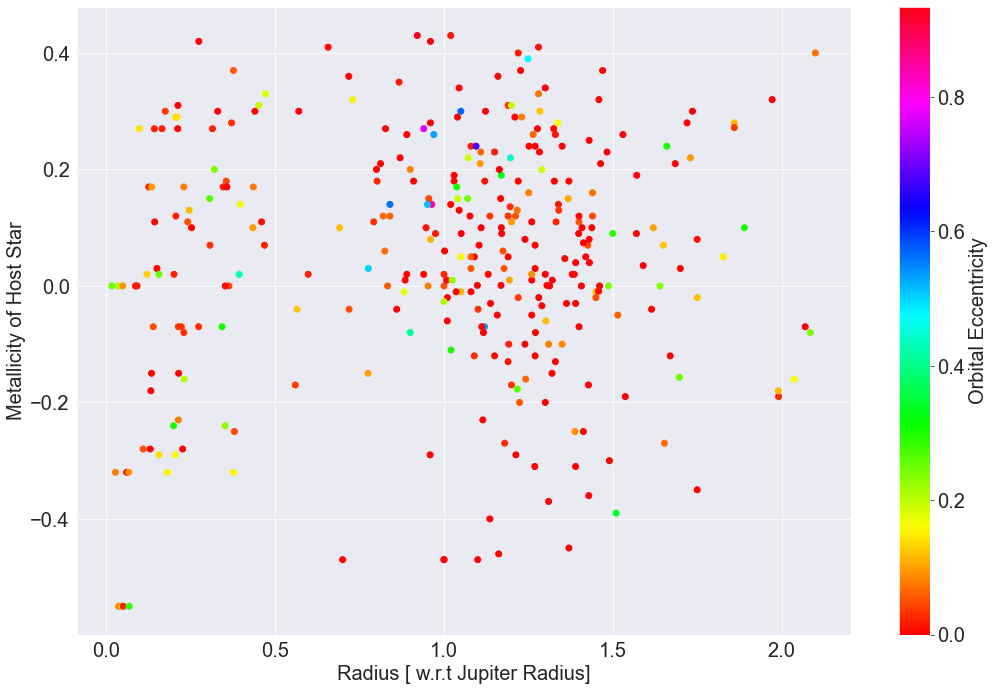

In [255]:
plt.scatter(x=exoplanets_df['RadiusJpt'], y=exoplanets_df['HostStarMetallicity'],c=exoplanets_df['Eccentricity'], cmap='hsv')
plt.colorbar(label='Orbital Eccentricity')
plt.xlabel('Radius [ w.r.t Jupiter Radius]')
plt.ylabel('Metallicity of Host Star')

## ----------------------------------------------------------------------------------------------------------------------------------